In [658]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [659]:
data = pd.read_csv("train.csv")

In [660]:
data.sample(15)

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
497,952,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S,NaN,0
769,1276,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,NaN,0
879,562,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q,13,1
373,24,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,1
187,302,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,1
48,100,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,1
163,581,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,NaN,0
546,603,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S,A,1
346,518,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S,NaN,0
463,1269,3,"Vande Velde, Mr. Johannes Joseph",male,33.0,0,0,345780,9.5000,NaN,S,NaN,0


In [661]:
data.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [662]:
data.columns

Index(['traveller_ID', 'ticket_class', 'name', 'sex', 'age',
       'Siblings_spouses', 'Parchil', 'TickNum', 'fare', 'cabin', 'embarked',
       'MedBoat', 'Survived'],
      dtype='object')

In [663]:
data.isnull().sum()

traveller_ID          0
ticket_class          0
name                  0
sex                   0
age                 187
Siblings_spouses      0
Parchil               0
TickNum               0
fare                  1
cabin               712
embarked              1
MedBoat             589
Survived              0
dtype: int64

In [664]:
data["MedBoat"].unique()

array([nan, '11', '15', '16', 'B', 'C', 'D', '10', '9', '4', '3', '1',
       'A', '8', '12', '14', '7', '13', '5', '6', '2', '13 15', '15 16',
       '5 7', '8 10'], dtype=object)

In [665]:
data['MedBoat'].astype(int, copy=True, errors='ignore')

0        NaN
1        NaN
2         11
3        NaN
4        NaN
5         15
6        NaN
7         15
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17        16
18       NaN
19       NaN
20       NaN
21        11
22       NaN
23       NaN
24         B
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
       ...  
886      NaN
887       13
888      NaN
889       16
890      NaN
891      NaN
892        5
893      NaN
894      NaN
895      NaN
896      NaN
897      NaN
898       14
899       13
900       13
901      NaN
902        7
903      NaN
904        D
905        3
906      NaN
907    13 15
908      NaN
909        5
910       16
911      NaN
912      NaN
913      NaN
914      NaN
915      NaN
Name: MedBoat, Length: 916, dtype: object

In [666]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
traveller_ID        916 non-null int64
ticket_class        916 non-null int64
name                916 non-null object
sex                 916 non-null object
age                 729 non-null float64
Siblings_spouses    916 non-null int64
Parchil             916 non-null int64
TickNum             916 non-null object
fare                915 non-null float64
cabin               204 non-null object
embarked            915 non-null object
MedBoat             327 non-null object
Survived            916 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 93.1+ KB


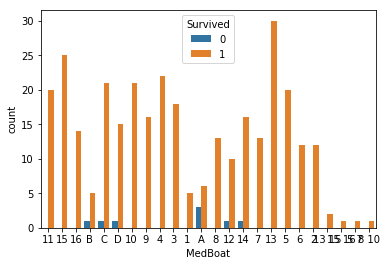

In [667]:
import seaborn as sns

sns.countplot('MedBoat', data=data, hue='Survived')

In [685]:

data['no medboat'] = data['MedBoat'].isnull()
data

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived,no medboat
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0,True
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0000,0,0,349224,7.8958,NaN,S,NaN,0,True
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0000,0,0,250655,26.0000,NaN,S,11,1,False
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0,True
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0000,0,0,347086,7.7750,NaN,S,NaN,0,True
5,895,3,"Johnson, Miss. Eleanor Ileen",female,1.0000,1,1,347742,11.1333,NaN,S,15,1,False
6,813,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S,NaN,0,True
7,745,3,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0000,0,0,382650,6.9500,NaN,Q,15,1,False
8,1030,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0,True
9,1072,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,NaN,0,True


In [545]:
data.columns.values

array(['traveller_ID', 'ticket_class', 'name', 'sex', 'age',
       'Siblings_spouses', 'Parchil', 'TickNum', 'fare', 'cabin',
       'embarked', 'MedBoat', 'Survived', 'no medboat'], dtype=object)

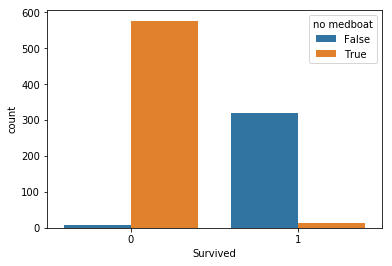

In [546]:
sns.countplot(data['Survived'],data=data, hue='no medboat')

In [547]:
co = data.corr()
co

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived,no medboat
traveller_ID,1.000000,0.899047,-0.338737,0.070936,0.032266,-0.477824,-0.303913,0.312347
ticket_class,0.899047,1.000000,-0.384467,0.061178,0.038908,-0.555562,-0.316505,0.327582
age,-0.338737,-0.384467,1.000000,-0.246946,-0.174866,0.137666,-0.014920,0.010206
Siblings_spouses,0.070936,0.061178,-0.246946,1.000000,0.367258,0.158024,-0.013675,0.019701
Parchil,0.032266,0.038908,-0.174866,0.367258,1.000000,0.214890,0.071425,-0.070458
fare,-0.477824,-0.555562,0.137666,0.158024,0.214890,1.000000,0.261934,-0.268871
Survived,-0.303913,-0.316505,-0.014920,-0.013675,0.071425,0.261934,1.000000,-0.952613
no medboat,0.312347,0.327582,0.010206,0.019701,-0.070458,-0.268871,-0.952613,1.000000


In [548]:
drop_col = ['fare','cabin','traveller_ID','TickNum','name','MedBoat']
data.drop(drop_col, axis=1, inplace=True)
data.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,Survived,no medboat
0,3,male,NaN,0,0,S,0,True
1,3,male,26.0,0,0,S,0,True
2,2,female,19.0,0,0,S,1,False
3,3,female,NaN,8,2,S,0,True
4,3,female,28.0,0,0,S,0,True


In [549]:
data.sample(30)

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,Survived,no medboat
730,2,male,22.0,2,0,S,0,True
309,3,male,19.0,0,0,S,0,True
800,3,female,18.0,0,1,S,1,False
584,1,male,27.0,0,2,C,0,True
418,2,male,25.0,0,0,S,0,True
32,1,male,30.0,1,2,S,0,True
422,3,male,43.0,0,0,S,0,True
529,3,male,NaN,8,2,S,0,True
480,1,male,28.5,0,0,C,0,True
728,3,male,31.0,0,0,S,1,False


In [550]:
data['age']

0          NaN
1      26.0000
2      19.0000
3          NaN
4      28.0000
5       1.0000
6          NaN
7      30.0000
8          NaN
9          NaN
10     52.0000
11     20.0000
12         NaN
13     62.0000
14     23.5000
15         NaN
16     20.0000
17         NaN
18     30.0000
19     48.0000
20     45.0000
21     33.0000
22     40.5000
23     27.0000
24     53.0000
25     57.0000
26     20.0000
27         NaN
28     24.0000
29      2.0000
        ...   
886    16.0000
887     9.0000
888    31.0000
889        NaN
890     0.3333
891    61.0000
892    47.0000
893    42.0000
894        NaN
895    57.0000
896        NaN
897        NaN
898     8.0000
899        NaN
900    34.0000
901    22.0000
902    22.0000
903        NaN
904        NaN
905    27.0000
906    57.0000
907    25.0000
908    34.0000
909        NaN
910        NaN
911        NaN
912    18.0000
913    28.5000
914    26.0000
915    28.0000
Name: age, Length: 916, dtype: float64

(array([ 49.,  49., 199., 182., 103.,  76.,  42.,  24.,   3.,   2.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

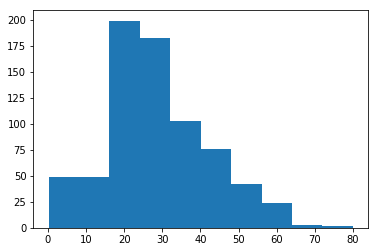

In [551]:
var = np.array(data['age'].dropna())
plt.hist(var)

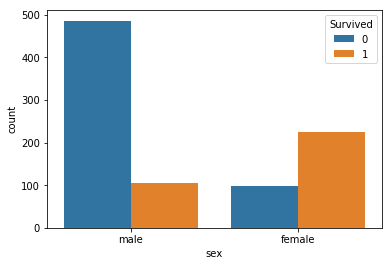

In [552]:
import seaborn as sns

sns.countplot(x=data['sex'], hue = data['Survived'], data = data)

In [553]:
print(f"{data[data['sex'] == 'male'].dropna().mean()['age']}, \n {data['age'].dropna().mean()} \n \
      {data[data['sex'] == 'female'].dropna().mean()['age']}")

29.74783528138528, 
 29.102309053497944 
       27.857456390977443


In [554]:
data['age'] = data['age'].fillna(data[data['sex']=='female']['age'].mean())

In [555]:
data['age']

0      27.985331
1      26.000000
2      19.000000
3      27.985331
4      28.000000
5       1.000000
6      27.985331
7      30.000000
8      27.985331
9      27.985331
10     52.000000
11     20.000000
12     27.985331
13     62.000000
14     23.500000
15     27.985331
16     20.000000
17     27.985331
18     30.000000
19     48.000000
20     45.000000
21     33.000000
22     40.500000
23     27.000000
24     53.000000
25     57.000000
26     20.000000
27     27.985331
28     24.000000
29      2.000000
         ...    
886    16.000000
887     9.000000
888    31.000000
889    27.985331
890     0.333300
891    61.000000
892    47.000000
893    42.000000
894    27.985331
895    57.000000
896    27.985331
897    27.985331
898     8.000000
899    27.985331
900    34.000000
901    22.000000
902    22.000000
903    27.985331
904    27.985331
905    27.000000
906    57.000000
907    25.000000
908    34.000000
909    27.985331
910    27.985331
911    27.985331
912    18.000000
913    28.5000

In [556]:
data.isnull().sum()

ticket_class        0
sex                 0
age                 0
Siblings_spouses    0
Parchil             0
embarked            1
Survived            0
no medboat          0
dtype: int64

In [557]:
data['embarked'].mode()

0    S
dtype: object

In [558]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode())

In [559]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
ticket_class        916 non-null int64
sex                 916 non-null object
age                 916 non-null float64
Siblings_spouses    916 non-null int64
Parchil             916 non-null int64
embarked            915 non-null object
Survived            916 non-null int64
no medboat          916 non-null bool
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 51.1+ KB


In [560]:
#pd.get_dummies(data['sex'])

In [561]:
#pd.get_dummies(data[['sex', 'embarked']])

In [562]:
data_dummy = pd.get_dummies(data[['sex','embarked']])                       

In [563]:
data_dummy

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,1
1,0,1,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1
5,1,0,0,0,1
6,0,1,0,0,1
7,1,0,0,1,0
8,0,1,0,1,0
9,0,1,0,1,0


In [564]:
data=pd.concat([data, data_dummy], axis=1)

In [565]:
data

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,Survived,no medboat,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,male,27.985331,0,0,S,0,True,0,1,0,0,1
1,3,male,26.000000,0,0,S,0,True,0,1,0,0,1
2,2,female,19.000000,0,0,S,1,False,1,0,0,0,1
3,3,female,27.985331,8,2,S,0,True,1,0,0,0,1
4,3,female,28.000000,0,0,S,0,True,1,0,0,0,1
5,3,female,1.000000,1,1,S,1,False,1,0,0,0,1
6,3,male,27.985331,0,0,S,0,True,0,1,0,0,1
7,3,female,30.000000,0,0,Q,1,False,1,0,0,1,0
8,3,male,27.985331,0,0,Q,0,True,0,1,0,1,0
9,3,male,27.985331,0,0,Q,0,True,0,1,0,1,0


In [566]:
#data.loc[data['sex']=='female','sex'] = 1
#data.loc[data['sex']=='male','sex'] = 0

In [567]:
listd = ['embarked']
data = data.drop(listd,axis=1)

In [568]:
#check for inbalancing. check ratio of people that survive to those who dont. if 1:n ur data not balance, oversampling or undersampling to correct.
data

,ticket_class,sex,age,Siblings_spouses,Parchil,Survived,no medboat,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,male,27.985331,0,0,0,True,0,1,0,0,1
1,3,male,26.000000,0,0,0,True,0,1,0,0,1
2,2,female,19.000000,0,0,1,False,1,0,0,0,1
3,3,female,27.985331,8,2,0,True,1,0,0,0,1
4,3,female,28.000000,0,0,0,True,1,0,0,0,1
5,3,female,1.000000,1,1,1,False,1,0,0,0,1
6,3,male,27.985331,0,0,0,True,0,1,0,0,1
7,3,female,30.000000,0,0,1,False,1,0,0,1,0
8,3,male,27.985331,0,0,0,True,0,1,0,1,0
9,3,male,27.985331,0,0,0,True,0,1,0,1,0


In [569]:
y = data['Survived']
x = data.drop(['sex','Survived'], axis=1)

In [570]:
SC = StandardScaler()

x = pd.DataFrame(SC.fit_transform(x))


In [571]:
x

,0,1,2,3,4,5,6,7,8,9
0,0.825248,-0.071860,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
1,0.825248,-0.232350,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
2,-0.363317,-0.798213,-0.498616,-0.432553,-1.342097,1.351725,-1.351725,-0.506474,-0.330089,0.660104
3,0.825248,-0.071860,6.897852,1.805972,0.745103,1.351725,-1.351725,-0.506474,-0.330089,0.660104
4,0.825248,-0.070675,-0.498616,-0.432553,0.745103,1.351725,-1.351725,-0.506474,-0.330089,0.660104
5,0.825248,-2.253288,0.425943,0.686709,-1.342097,1.351725,-1.351725,-0.506474,-0.330089,0.660104
6,0.825248,-0.071860,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
7,0.825248,0.091000,-0.498616,-0.432553,-1.342097,1.351725,-1.351725,-0.506474,3.029485,-1.514914
8,0.825248,-0.071860,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,3.029485,-1.514914
9,0.825248,-0.071860,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,3.029485,-1.514914


In [572]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [573]:
#random state, use a uniform random state
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0,random_state =0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [574]:
y_pred = classifier.predict(x_test)

In [575]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [576]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("precision: ", metrics.precision_score(y_test,y_pred))
print("f1 score: ", metrics.f1_score(y_test, y_pred))
print("recall_score: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.9868995633187773
precision:  0.9861111111111112
f1 score:  0.9793103448275863
recall_score:  0.9726027397260274


In [577]:
cm_log = confusion_matrix(y_test,y_pred)
cm_log

array([[155,   1],
       [  2,  71]], dtype=int64)

In [578]:
cr = classification_report(y_pred,y_test)

In [579]:
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       157
          1       0.97      0.99      0.98        72

avg / total       0.99      0.99      0.99       229



In [580]:
## Using the RandomForest Classifier model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=10,n_estimators=50) 


In [581]:
model.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [582]:
y_pred1 = model.predict(x_test)

In [583]:
y_pred1

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [584]:
cm_log = confusion_matrix(y_test,y_pred1)
cm_log

array([[154,   2],
       [  3,  70]], dtype=int64)

In [585]:
cr = classification_report(y_pred1,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       157
          1       0.96      0.97      0.97        72

avg / total       0.98      0.98      0.98       229



In [586]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred1))
print("precision: ", metrics.precision_score(y_test,y_pred1))
print("f1 score: ", metrics.f1_score(y_test, y_pred1))
print("recall_score: ", metrics.recall_score(y_test, y_pred1))

Accuracy:  0.9781659388646288
precision:  0.9722222222222222
f1 score:  0.9655172413793104
recall_score:  0.958904109589041


In [587]:
from xgboost import XGBClassifier


In [588]:
model2 = XGBClassifier(objective='binary:logistic',n_estimators = 100, max_depth=4,seed=123)


In [589]:
model2.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=123, silent=None,
       subsample=1, verbosity=1)

In [590]:
y_pred2 = model2.predict(x_test)

C:\Users\AdaramolaOluwaseyi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [591]:
y_pred2

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [592]:
cm_log = confusion_matrix(y_test,y_pred2)
cm_log

array([[154,   2],
       [  2,  71]], dtype=int64)

In [593]:
cr = classification_report(y_pred2,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       156
          1       0.97      0.97      0.97        73

avg / total       0.98      0.98      0.98       229



In [594]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred2))
print("precision: ", metrics.precision_score(y_test,y_pred2))
print("f1 score: ", metrics.f1_score(y_test, y_pred2))
print("recall_score: ", metrics.recall_score(y_test, y_pred2))

Accuracy:  0.982532751091703
precision:  0.9726027397260274
f1 score:  0.9726027397260274
recall_score:  0.9726027397260274


In [595]:
from sklearn import tree

In [596]:
model3 = tree.DecisionTreeClassifier(random_state = 1)
model3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [597]:
y_pred3 = model3.predict(x_test)

In [598]:
y_pred3

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [599]:
cm_log = confusion_matrix(y_test,y_pred3)
cm_log

array([[154,   2],
       [  7,  66]], dtype=int64)

In [600]:
cr = classification_report(y_pred3,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       161
          1       0.90      0.97      0.94        68

avg / total       0.96      0.96      0.96       229



In [601]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred3))
print("precision: ", metrics.precision_score(y_test,y_pred3))
print("f1 score: ", metrics.f1_score(y_test, y_pred3))
print("recall_score: ", metrics.recall_score(y_test, y_pred3))

Accuracy:  0.9606986899563319
precision:  0.9705882352941176
f1 score:  0.9361702127659575
recall_score:  0.9041095890410958


In [602]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=5)

In [603]:
model4.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [604]:
y_pred4 = model4.predict(x_test)

In [605]:
y_pred4

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [606]:
cm_log = confusion_matrix(y_test,y_pred4)
cm_log

array([[153,   3],
       [  4,  69]], dtype=int64)

In [607]:
cr = classification_report(y_pred4,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       157
          1       0.95      0.96      0.95        72

avg / total       0.97      0.97      0.97       229



In [608]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=1.0, random_state = 1) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [609]:
y_pred5 = clf.predict(x_test)

In [610]:
y_pred5

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [611]:
cm_log = confusion_matrix(y_test,y_pred5)
cm_log

array([[155,   1],
       [  2,  71]], dtype=int64)

In [612]:
cr = classification_report(y_pred5,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       157
          1       0.97      0.99      0.98        72

avg / total       0.99      0.99      0.99       229



In [613]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred5))
print("precision: ", metrics.precision_score(y_test,y_pred5))
print("f1 score: ", metrics.f1_score(y_test, y_pred5))
print("recall_score: ", metrics.recall_score(y_test, y_pred5))

Accuracy:  0.9868995633187773
precision:  0.9861111111111112
f1 score:  0.9793103448275863
recall_score:  0.9726027397260274


# TO check for feature importances on random forest classifier

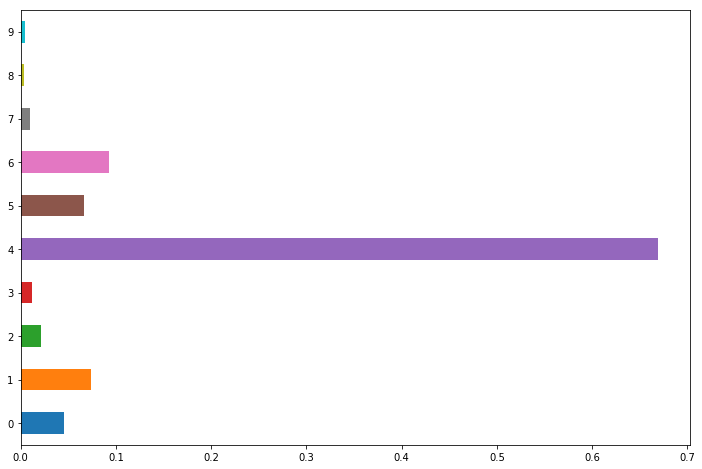

In [614]:
importances = pd.Series(model.feature_importances_, index=x_train.columns)
importances.plot(kind='barh', figsize=(12,8))

In [615]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model6 = GaussianNB()

# Train the model using the training sets
model6.fit(x_train,y_train)


GaussianNB(priors=None)

In [616]:
y_pred6 = model6.predict(x_test)

In [617]:
y_pred6

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [618]:
cm_log = confusion_matrix(y_test,y_pred6)
cm_log

array([[155,   1],
       [  2,  71]], dtype=int64)

In [619]:
cr = classification_report(y_pred6,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       157
          1       0.97      0.99      0.98        72

avg / total       0.99      0.99      0.99       229



In [620]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred6))
print("precision: ", metrics.precision_score(y_test,y_pred6))
print("f1 score: ", metrics.f1_score(y_test, y_pred6))
print("recall_score: ", metrics.recall_score(y_test, y_pred6))

Accuracy:  0.9868995633187773
precision:  0.9861111111111112
f1 score:  0.9793103448275863
recall_score:  0.9726027397260274


In [688]:
#TO PREDICT ON THE TEST SETS



In [689]:
test = pd.read_csv('test.csv')

In [690]:
test

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat
0,1148,3.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,NaN,S,NaN
1,1049,3.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,NaN,C,C
2,982,3.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,NaN,S,NaN
3,808,3.0,"Ford, Mr. Arthur",male,NaN,0.0,0.0,A/5 1478,8.0500,NaN,S,NaN
4,1195,3.0,"Shaughnessy, Mr. Patrick",male,NaN,0.0,0.0,370374,7.7500,NaN,Q,NaN
5,240,1.0,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0.0,0.0,111428,26.5500,NaN,S,9
6,1118,3.0,"Peltomaki, Mr. Nikolai Johannes",male,25.0,0.0,0.0,STON/O 2. 3101291,7.9250,NaN,S,NaN
7,596,2.0,"Wilhelms, Mr. Charles",male,31.0,0.0,0.0,244270,13.0000,NaN,S,9
8,924,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN
9,65,1.0,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1.0,0.0,113806,53.1000,E8,S,5


In [691]:
test.isnull().sum().sort_values(ascending=False)

cabin               302
MedBoat             234
age                  76
embarked              1
fare                  0
TickNum               0
Parchil               0
Siblings_spouses      0
sex                   0
name                  0
ticket_class          0
traveller_ID          0
dtype: int64

In [692]:
test.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare
count,393.000000,393.000000,317.000000,393.000000,393.000000,393.000000
mean,648.758270,2.269720,31.672187,0.404580,0.381679,32.332188
std,370.986997,0.829017,15.472486,0.934967,0.796594,49.199401
min,10.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,327.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,618.000000,3.000000,30.000000,0.000000,0.000000,13.000000
75%,986.000000,3.000000,40.500000,1.000000,0.000000,31.275000
max,1301.000000,3.000000,74.000000,8.000000,6.000000,512.329200


In [693]:
test['no medboat'] = test['MedBoat'].isnull()
test

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,no medboat
0,1148,3.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,NaN,S,NaN,True
1,1049,3.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,NaN,C,C,False
2,982,3.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,NaN,S,NaN,True
3,808,3.0,"Ford, Mr. Arthur",male,NaN,0.0,0.0,A/5 1478,8.0500,NaN,S,NaN,True
4,1195,3.0,"Shaughnessy, Mr. Patrick",male,NaN,0.0,0.0,370374,7.7500,NaN,Q,NaN,True
5,240,1.0,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0.0,0.0,111428,26.5500,NaN,S,9,False
6,1118,3.0,"Peltomaki, Mr. Nikolai Johannes",male,25.0,0.0,0.0,STON/O 2. 3101291,7.9250,NaN,S,NaN,True
7,596,2.0,"Wilhelms, Mr. Charles",male,31.0,0.0,0.0,244270,13.0000,NaN,S,9,False
8,924,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN,True
9,65,1.0,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1.0,0.0,113806,53.1000,E8,S,5,False


In [694]:
drop_col1 = ['fare','cabin','traveller_ID','TickNum','name','MedBoat']
test.drop(drop_col1, axis=1, inplace=True)
test.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,no medboat
0,3.0,male,35.0,0.0,0.0,S,True
1,3.0,male,20.0,1.0,1.0,C,False
2,3.0,male,NaN,0.0,0.0,S,True
3,3.0,male,NaN,0.0,0.0,S,True
4,3.0,male,NaN,0.0,0.0,Q,True


In [695]:
test['age'] = test['age'].fillna(test['age'].mean())

In [696]:
test['age'].mean()

31.67218738170349

In [697]:
test

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,no medboat
0,3.0,male,35.000000,0.0,0.0,S,True
1,3.0,male,20.000000,1.0,1.0,C,False
2,3.0,male,31.672187,0.0,0.0,S,True
3,3.0,male,31.672187,0.0,0.0,S,True
4,3.0,male,31.672187,0.0,0.0,Q,True
5,1.0,male,45.000000,0.0,0.0,S,False
6,3.0,male,25.000000,0.0,0.0,S,True
7,2.0,male,31.000000,0.0,0.0,S,False
8,3.0,male,34.500000,0.0,0.0,Q,True
9,1.0,female,33.000000,1.0,0.0,S,False


In [698]:
test.isnull().sum()

ticket_class        0
sex                 0
age                 0
Siblings_spouses    0
Parchil             0
embarked            1
no medboat          0
dtype: int64

In [699]:
test['embarked'].mode()

0    S
dtype: object

In [700]:
import seaborn as sns

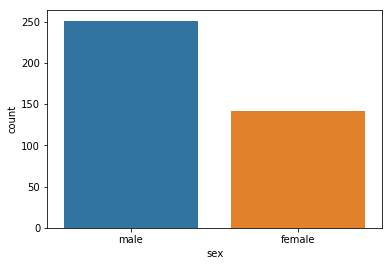

In [701]:
sns.countplot(test['sex'], data=test)

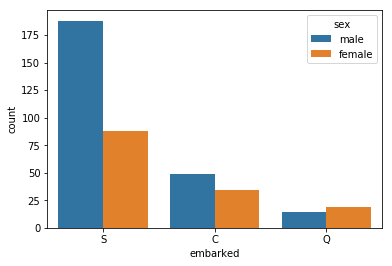

In [702]:
sns.countplot(test['embarked'],hue=test['sex'], data=test)

In [703]:
test['embarked'] = test['embarked'].fillna('S')

In [704]:
test

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,no medboat
0,3.0,male,35.000000,0.0,0.0,S,True
1,3.0,male,20.000000,1.0,1.0,C,False
2,3.0,male,31.672187,0.0,0.0,S,True
3,3.0,male,31.672187,0.0,0.0,S,True
4,3.0,male,31.672187,0.0,0.0,Q,True
5,1.0,male,45.000000,0.0,0.0,S,False
6,3.0,male,25.000000,0.0,0.0,S,True
7,2.0,male,31.000000,0.0,0.0,S,False
8,3.0,male,34.500000,0.0,0.0,Q,True
9,1.0,female,33.000000,1.0,0.0,S,False


In [705]:
data_dummy1 = pd.get_dummies(test[['sex','embarked']])                       

In [706]:
data_dummy1

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,1
1,0,1,1,0,0
2,0,1,0,0,1
3,0,1,0,0,1
4,0,1,0,1,0
5,0,1,0,0,1
6,0,1,0,0,1
7,0,1,0,0,1
8,0,1,0,1,0
9,1,0,0,0,1


In [707]:
test=pd.concat([test, data_dummy1], axis=1)

In [708]:
test

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,no medboat,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3.0,male,35.000000,0.0,0.0,S,True,0,1,0,0,1
1,3.0,male,20.000000,1.0,1.0,C,False,0,1,1,0,0
2,3.0,male,31.672187,0.0,0.0,S,True,0,1,0,0,1
3,3.0,male,31.672187,0.0,0.0,S,True,0,1,0,0,1
4,3.0,male,31.672187,0.0,0.0,Q,True,0,1,0,1,0
5,1.0,male,45.000000,0.0,0.0,S,False,0,1,0,0,1
6,3.0,male,25.000000,0.0,0.0,S,True,0,1,0,0,1
7,2.0,male,31.000000,0.0,0.0,S,False,0,1,0,0,1
8,3.0,male,34.500000,0.0,0.0,Q,True,0,1,0,1,0
9,1.0,female,33.000000,1.0,0.0,S,False,1,0,0,0,1


In [709]:
listd1 = ['sex','embarked']
test = test.drop(listd1,axis=1)

In [710]:
test = pd.DataFrame(SC.transform(test))

In [711]:
test

,0,1,2,3,4,5,6,7,8,9
0,0.825248,0.495188,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
1,0.825248,-0.717375,0.425943,0.686709,-1.342097,-0.739795,0.739795,1.974436,-0.330089,-1.514914
2,0.825248,0.226176,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
3,0.825248,0.226176,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
4,0.825248,0.226176,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,3.029485,-1.514914
5,-1.551881,1.303564,-0.498616,-0.432553,-1.342097,-0.739795,0.739795,-0.506474,-0.330089,0.660104
6,0.825248,-0.313187,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
7,-0.363317,0.171838,-0.498616,-0.432553,-1.342097,-0.739795,0.739795,-0.506474,-0.330089,0.660104
8,0.825248,0.454769,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,3.029485,-1.514914
9,-1.551881,0.333513,0.425943,-0.432553,-1.342097,1.351725,-1.351725,-0.506474,-0.330089,0.660104


In [724]:
classifier


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [725]:
preder = classifier.predict(test)

In [726]:
preder

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [727]:
sample_submission = pd.read_csv("sample_submission.csv")

In [728]:
sample_submission

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,1
4,1195,0
5,240,1
6,1118,0
7,596,1
8,924,0
9,65,1


In [729]:
submission_file = sample_submission.copy()

In [730]:
submission_file

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,1
4,1195,0
5,240,1
6,1118,0
7,596,1
8,924,0
9,65,1


In [731]:
submission_file.Survived = preder

In [732]:
submission_file.Survived

0      0
1      1
2      0
3      0
4      0
5      1
6      0
7      1
8      0
9      1
10     0
11     0
12     1
13     0
14     0
15     1
16     0
17     1
18     1
19     0
20     0
21     0
22     0
23     1
24     1
25     0
26     0
27     1
28     1
29     0
      ..
363    0
364    1
365    1
366    0
367    0
368    0
369    1
370    0
371    1
372    0
373    1
374    0
375    1
376    1
377    0
378    0
379    0
380    1
381    0
382    1
383    0
384    0
385    1
386    0
387    0
388    0
389    0
390    0
391    1
392    0
Name: Survived, Length: 393, dtype: int64

In [733]:
submission_file.head()

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,0
4,1195,0


In [734]:
submission_file.to_csv('classifier.csv', index=False)